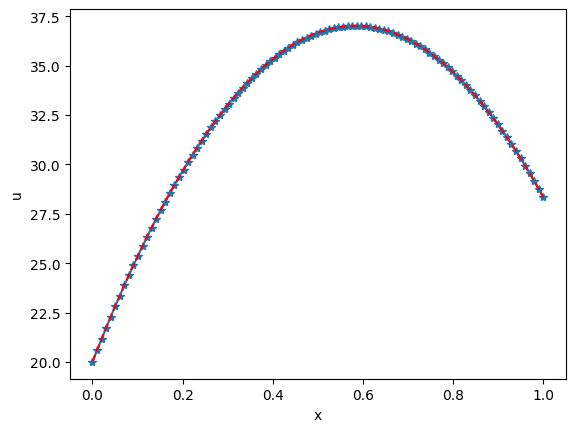

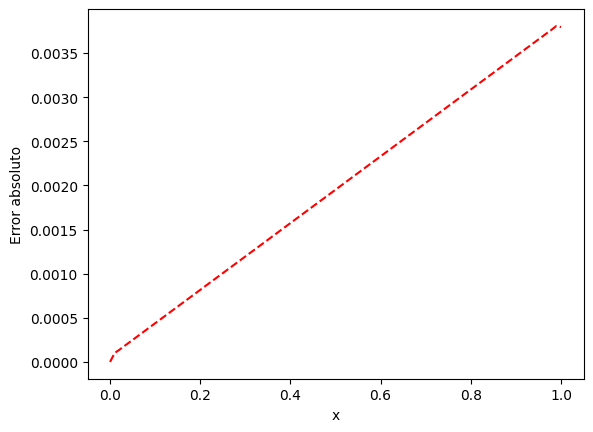

In [1]:
#ejemplo kanda 1D difusion diffusion with source and dirichlet conditions or convection at the tip
import numpy as np
import matplotlib.pyplot as plt
n=100
L=1.0
dx=L/(n-1)
x=np.linspace(0,L,n)
c=0.1
Ts=20.0
q=100.0
h=5.0
Tm=20

F=np.zeros((n,n))
DF=np.zeros((n,n))
alfa=np.zeros(n)
rhs=np.zeros(n)
u=np.zeros(n)
u_exact=np.zeros(n)

def fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(c**2+r**2)**(1.0/2.0)
  return y

def dfi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(x-xepsi)/fi(x,xepsi)
  return y

def d2fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=-(x-xepsi)**2/fi(x,xepsi)**3+1.0/fi(x,xepsi)
  return y    

def exact_convection(x):
  c1=(q*L+q*L**2*h/2.0-h*(Ts-Tm))/(1+h*L)
  y=-q*x**2/2.0+c1*x+Ts  
  return y



for i in range(n):
  if i==0:
    for j in range(n):
      DF[i,j]=fi(x[i],x[j])
    rhs[i]=Ts
  if i>0 and i<n-1:
    for j in range(n):
     DF[i,j]=d2fi(x[i],x[j])
    rhs[i]=-q      
  if i==n-1:
    for j in range(n):
#convection case
      DF[i,j]=-dfi(x[i],x[j])-h*fi(x[i],x[j])
    rhs[i]=-h*Tm  

for i in range(n):
  for j in range(n):
    F[i,j]=fi(x[i],x[j])

alfa=np.linalg.solve(DF,rhs)
u=np.matmul(F,alfa)

for i in range(n):
  u_exact[i]=exact_convection(x[i])

plt.figure(1)
plt.plot(x,u,'*-')
plt.plot(x,u_exact,'--r')
plt.xlabel('x')
plt.ylabel('u')

plt.figure(2)
plt.plot(x,np.abs(u-u_exact),'--r')
plt.xlabel('x')
plt.ylabel('Error absoluto')

plt.rcParams['figure.figsize'] = (9, 9)







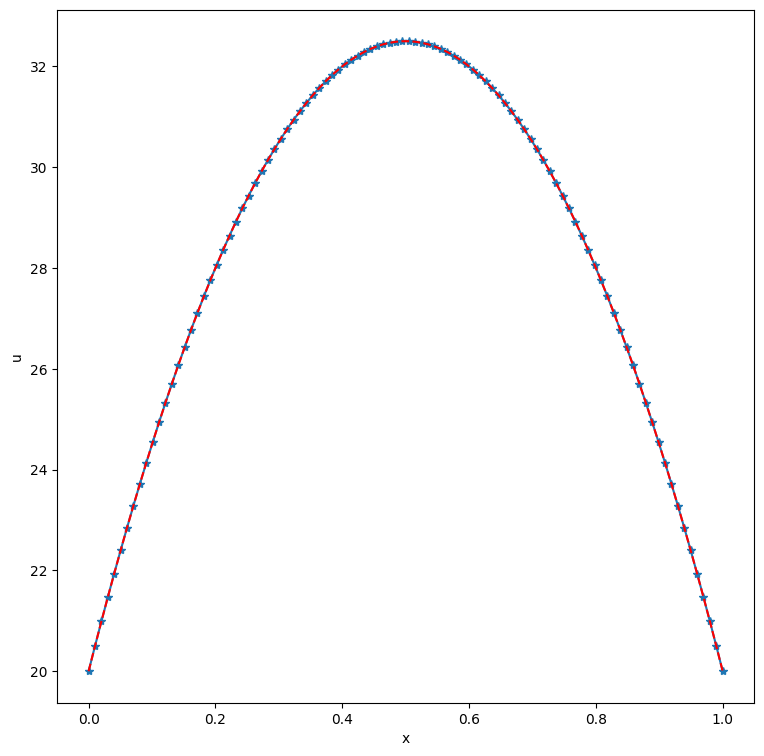

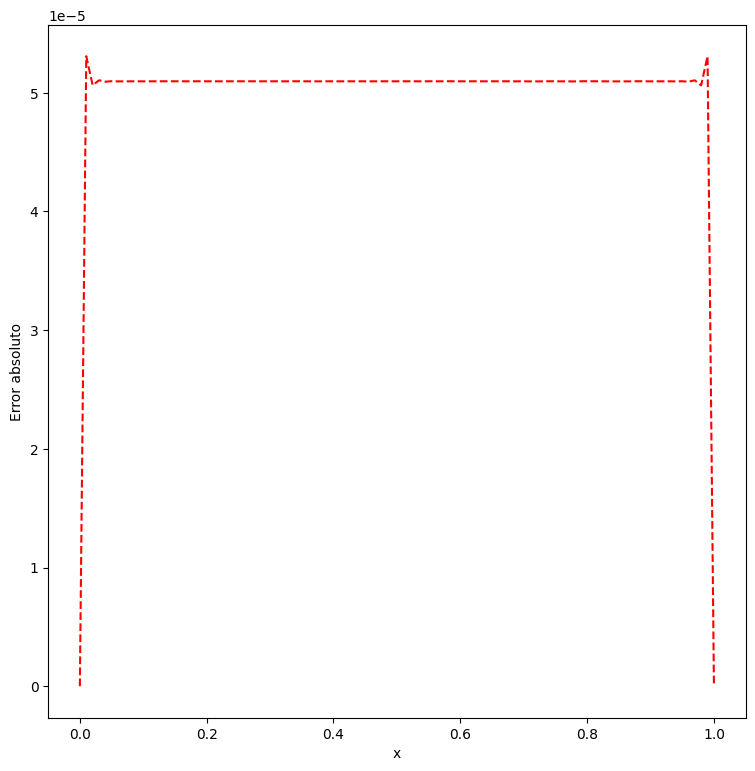

In [2]:
#ejemplo kanda 1D difusion diffusion with source and dirichlet conditions or convection at the tip
import numpy as np
import matplotlib.pyplot as plt
n=100
L=1.0
dx=L/(n-1)
x=np.linspace(0,L,n)
c=0.1
Ts=20.0
q=100.0
h=5.0
Tm=20

F=np.zeros((n,n))
DF=np.zeros((n,n))
alfa=np.zeros(n)
rhs=np.zeros(n)
u=np.zeros(n)
u_exact=np.zeros(n)

def fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(c**2+r**2)**(1.0/2.0)
  return y

def dfi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(x-xepsi)/fi(x,xepsi)
  return y

def d2fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=-(x-xepsi)**2/fi(x,xepsi)**3+1.0/fi(x,xepsi)
  return y    

def exact_dirichlet(x):
  c1=q*L/2.0
  y=-q*x**2/2.0+c1*x+Ts  
  return y



for i in range(n):
  if i==0:
    for j in range(n):
      DF[i,j]=fi(x[i],x[j])
    rhs[i]=Ts
  if i>0 and i<n-1:
    for j in range(n):
     DF[i,j]=d2fi(x[i],x[j])
    rhs[i]=-q      
  if i==n-1:
    for j in range(n):
#dirichlet case
      DF[i,j]=fi(x[i],x[j]) #dirichlet case
    rhs[i]=Ts


for i in range(n):
  for j in range(n):
    F[i,j]=fi(x[i],x[j])

alfa=np.linalg.solve(DF,rhs)
u=np.matmul(F,alfa)

for i in range(n):
  u_exact[i]=exact_dirichlet(x[i])

plt.figure(1)
plt.plot(x,u,'*-')
plt.plot(x,u_exact,'--r')
plt.xlabel('x')
plt.ylabel('u')

plt.figure(2)
plt.plot(x,np.abs(u-u_exact),'--r')
plt.xlabel('x')
plt.ylabel('Error absoluto')

plt.rcParams['figure.figsize'] = (9, 9)



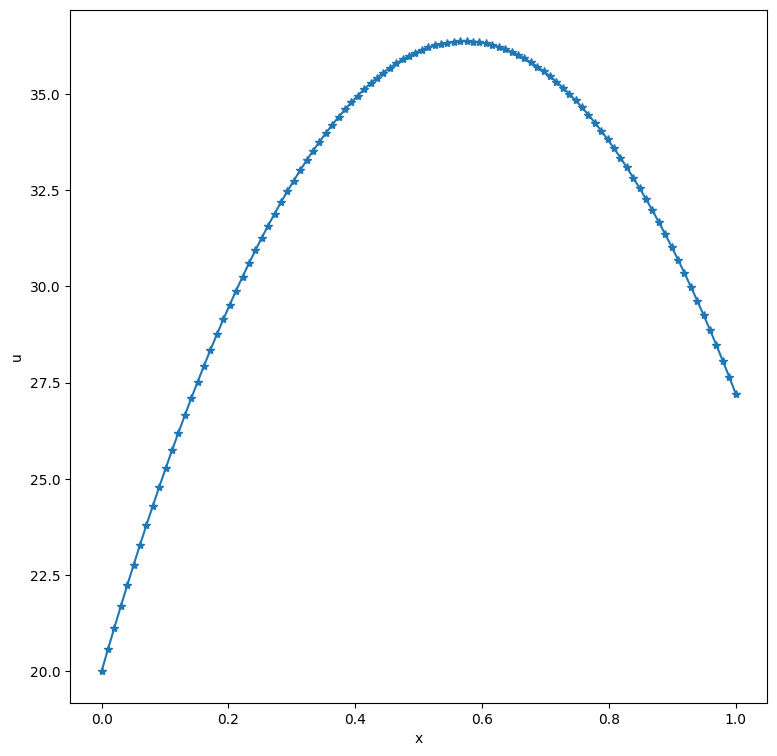

In [3]:
#ejemplo kanda 1D difusion diffusion with source and nonlinear radiation condition at the tip
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
n=100
L=1.0
dx=L/(n-1)
x=np.linspace(0,L,n)
c=0.1
Ts=20.0
q=100.0
h=5.0
Tm=20

F=np.zeros((n,n))
DF=np.zeros((n,n))
alfa=np.zeros(n)
rhs=np.zeros(n)
u=np.zeros(n)
u_exact=np.zeros(n)

def fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(c**2+r**2)**(1.0/2.0)
  return y

def dfi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=(x-xepsi)/fi(x,xepsi)
  return y

def d2fi(x,xepsi):
  r=((x-xepsi)**2)**(1.0/2.0)
  y=-(x-xepsi)**2/fi(x,xepsi)**3+1.0/fi(x,xepsi)
  return y    

for i in range(n):
  for j in range(n):
    F[i,j]=fi(x[i],x[j])

u[:]=Ts    

def fn(u):
  alfa=np.linalg.solve(F,u)
  for i in range(n):
    if i==0:
      for j in range(n):
        DF[i,j]=fi(x[i],x[j])
    if i>0 and i<n-1:
      for j in range(n):
        DF[i,j]=d2fi(x[i],x[j])
    if i==n-1:
      for j in range(n):
  #radiation case
        DF[i,j]=-dfi(x[i],x[j])
  y=np.matmul(DF,alfa)
  for i in range(n):
    if i==0:
      y[i]=y[i]-Ts
    if i>0 and i<n-1:
      y[i]=y[i]+q
    if i==n-1:
      y[i]=y[i]-5.67e-8*((u[i]+273.15)**4-(Tm+273.15)**4)
  return y    

u=fsolve(fn,u)

plt.figure(1)
plt.plot(x,u,'*-')
plt.xlabel('x')
plt.ylabel('u')

plt.rcParams['figure.figsize'] = (9, 9)

